In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
import numpy as np 

def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

In [3]:
X, y=gen_data(20, 0.5)
X

array([[ 0.5475931 , -0.69764558,  0.62350819, -0.67890952],
       [-0.67002989, -0.03864733, -0.03558352, -0.33282247],
       [-0.25259378,  0.60891925,  0.10850187, -0.1037492 ],
       [-0.05144635, -0.92872177, -0.16759861,  0.00612789],
       [ 0.98239079, -0.97406808,  0.39442174, -0.9656176 ],
       [-0.04976312, -0.34056692,  0.19388003, -0.36595269],
       [-0.4702064 ,  0.85833754, -0.16406529,  0.21590332],
       [-0.15243181,  0.04793937,  0.28340438, -0.45178876],
       [-0.7683305 ,  0.19155494, -0.08862542,  0.43076082],
       [ 0.4676409 , -0.14902359, -0.23675172, -0.05242125],
       [ 0.50907523,  0.47741531,  0.462779  , -0.00859712],
       [ 0.08030045,  0.64851936,  0.41245034,  0.39785478],
       [-0.48670975,  0.46094129, -0.4684438 ,  0.51596611],
       [-0.92807842,  0.41016029, -0.66298492,  0.47164575],
       [-0.12052664, -0.76945777,  0.2759523 , -0.85619993],
       [ 0.26421029, -0.79535115, -0.27534783, -0.28483416],
       [-0.11102721, -0.

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

In [9]:
# All imports

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso # L1
from sklearn.linear_model import Ridge # L2

100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


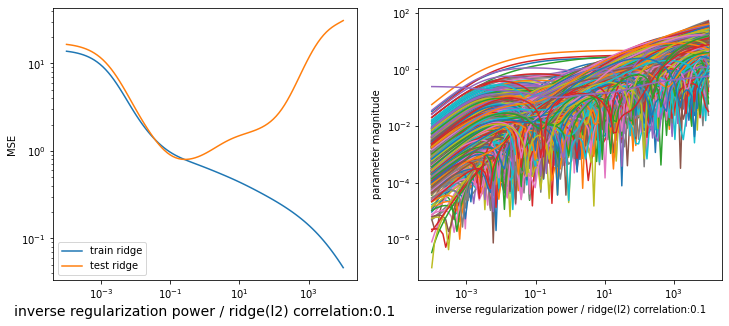

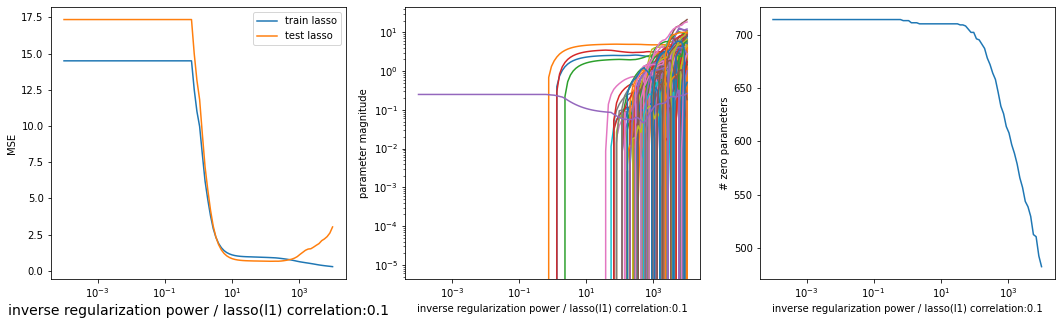

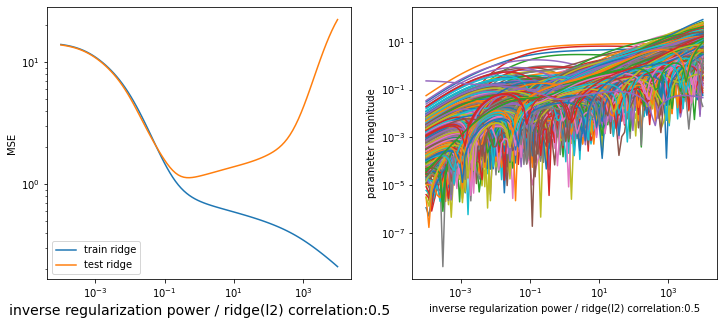

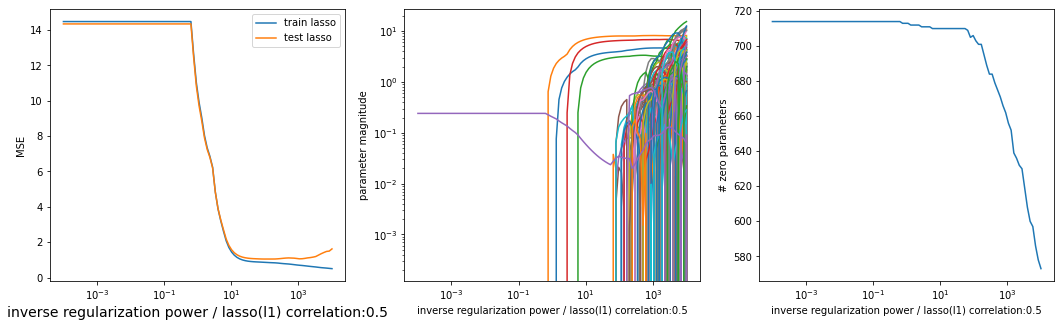

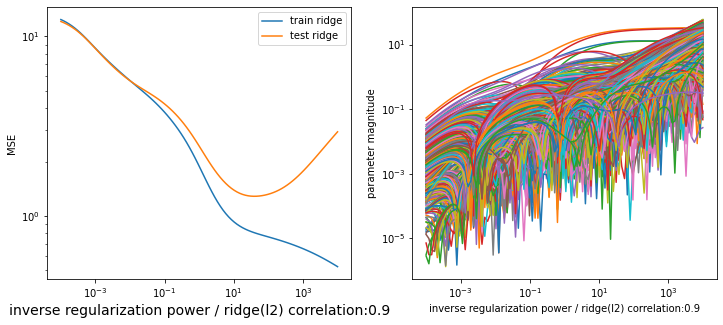

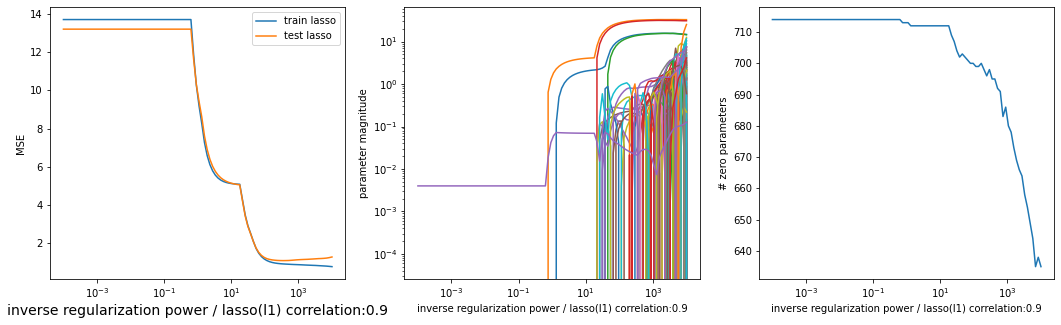

In [32]:
for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)
  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)
  reg_powers=alpha_values
  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []
  train_mse_ridge = [] #L2 regularization (ridge regression)
  test_mse_ridge = []  #L2 regularization (ridge regression)
  train_mse_lasso = [] #L1 regularization (lasso regression)
  test_mse_lasso = []  #L1 regularization (lasso regression)

  for alpha in tqdm(alpha_values):
      linear_model = Ridge(alpha=alpha)
      model = make_pipeline(PolynomialFeatures(9, include_bias=False),linear_model)
      model.fit(X_train, y_train)
      # utilizes an iterative procedure, which for small
      # alpha values may take a while to converge.
      linear_model2 = Lasso(alpha=alpha, max_iter=1000000)
      model2 = make_pipeline(PolynomialFeatures(9, include_bias=False),linear_model2)
      model2.fit(X_train, y_train)

      params_ridge.append(np.append(linear_model.coef_,linear_model.intercept_))
      params_lasso.append(np.append(linear_model2.coef_,linear_model2.intercept_))

      
      train_mse_ridge.append(mean_squared_error(y_train, model.predict(X_train)))
      test_mse_ridge.append(mean_squared_error(y_test, model.predict(X_test)))
      train_mse_lasso.append(mean_squared_error(y_train, model2.predict(X_train)))
      test_mse_lasso.append(mean_squared_error(y_test, model2.predict(X_test)))

  params_ridge  = np.array(params_ridge)
  params_lasso = np.array(params_lasso)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(1. / reg_powers, train_mse_ridge, label='train ridge')
  plt.plot(1. / reg_powers, test_mse_ridge, label='test ridge')
  plt.ylabel('MSE')
  plt.xlabel('inverse regularization power / ridge(l2) correlation:' +str(correlation), fontsize=14)
  plt.legend()
  plt.xscale('log')
  plt.yscale('log')
  plt.subplot(1, 2, 2)
  plt.plot(1. / reg_powers, np.abs(params_ridge));
  plt.xlabel("inverse regularization power / ridge(l2) correlation:"+str(correlation))
  plt.ylabel("parameter magnitude")
  plt.xscale('log')
  plt.yscale('log')

  plt.figure(figsize=(18, 5))
  plt.subplot(1, 3, 1)

  plt.plot(1. / reg_powers, train_mse_lasso, label='train lasso')
  plt.plot(1. / reg_powers, test_mse_lasso, label='test lasso')
  plt.ylabel('MSE')
  plt.xlabel('inverse regularization power / lasso(l1) correlation:'+str(correlation),fontsize=14)
  plt.legend()
  plt.xscale('log')
  plt.subplot(1, 3, 2)
  plt.plot(1. / reg_powers, np.abs(params_lasso));
  plt.xlabel('inverse regularization power / lasso(l1) correlation:'+str(correlation))
  plt.ylabel("parameter magnitude")
  plt.xscale('log')
  plt.yscale('log')

  plt.subplot(1, 3, 3)
  plt.plot(1. / reg_powers, np.isclose(params_lasso, 0.).sum(axis=1));
  plt.xlabel('inverse regularization power / lasso(l1) correlation:'+str(correlation))
  plt.ylabel("# zero parameters")
  plt.xscale('log')
  #axes.plot([-1, 1.5], [0, 0], color='black', lw=1, transform=axes.transAxes, clip_on=False)
  #axes.plot([-1, 1.5], [1, 1], color='black', lw=1, transform=axes.transAxes, clip_on=False)


#**Comment**

## When the correlation increases, Ridge regularization (L2) resistance for overfitting increases, whereas Lasso is resistant for overfitting with the all correlation values